In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
#!pip install openpyxl
try:
  df = pd.read_excel('Payment SurveyD.xlsx', engine='openpyxl')
  print(df.head())
except FileNotFoundError:
  print("Error: File not found. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

   Respondent ID  Collector ID          Start Date            End Date  \
0            NaN           NaN                 NaT                 NaT   
1   1.184525e+11   452782804.0 2023-10-25 16:14:52 2023-10-25 17:14:29   
2   1.184525e+11   452782804.0 2023-10-25 17:01:26 2023-10-25 17:14:28   
3   1.184525e+11   452782804.0 2023-10-25 17:04:47 2023-10-25 17:12:52   
4   1.184525e+11   452782804.0 2023-10-25 16:50:38 2023-10-25 17:08:55   

    IP Address 2.1 Ունե՞ք բանկային քարտ 2.2 Ունե՞ք բանկային հաշիվ  \
0          NaN                 Response                  Response   
1  5.39.206.18                       Ոչ                        Ոչ   
2  5.39.206.18                      Այո                        Ոչ   
3  5.39.206.18                      Այո                        Ոչ   
4  5.39.206.18                       Ոչ                        Ոչ   

  2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից   \
0                                  Response   
1                                        Ոչ   

In [ ]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,2.1 Ունե՞ք բանկային քարտ,2.2 Ունե՞ք բանկային հաշիվ,2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից,"2.4 Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(վերաբերում է միայն թվային հավելվածներին եվ քարտերին; բացառում է վճարային տերմինալները)",Unnamed: 9,...,Ամսաթիվ,Դուք այս պահին աշխատու՞մ եք,"Եթե աշխատում եք, ապա կնշե՞ք ոլորտը",Աշխատում եք որպես,Պատասխանողի կրթությունը,Պատասխանողի տարիքը,Ձեր միջին ամսական եկամտի միջնակայքը,Պատասխանողի սեռը,Հարցազրուցավար,Հեռ.
0,NaN,NaN,NaT,NaT,NaN,Response,Response,Response,1. Բանկի հավելված,2. Բանկային քարտ,...,Date / Time,Response,Response,Response,Response,Response,Response,Response,Response,Open-Ended Response
1,1.184525e+11,452782804.0,2023-10-25 16:14:52,2023-10-25 17:14:29,5.39.206.18,Ոչ,Ոչ,Ոչ,NaN,NaN,...,10/25/2023,NaN,NaN,NaN,NaN,45-54,NaN,Իգական,Աննա,077992915
2,1.184525e+11,452782804.0,2023-10-25 17:01:26,2023-10-25 17:14:28,5.39.206.18,Այո,Ոչ,Այո,1. Բանկի հավելված,2. Բանկային քարտ,...,10/25/2023,NaN,NaN,NaN,Բարձրագույն,NaN,NaN,Արական,Սերինե,093600436
3,1.184525e+11,452782804.0,2023-10-25 17:04:47,2023-10-25 17:12:52,5.39.206.18,Այո,Ոչ,Ոչ,NaN,NaN,...,10/25/2023,Այո,Պետական,Գործատու,Միջնակարգ,25-34,NaN,Արական,Աննա,077992967
4,1.184525e+11,452782804.0,2023-10-25 16:50:38,2023-10-25 17:08:55,5.39.206.18,Ոչ,Ոչ,Ոչ,NaN,NaN,...,10/25/2023,Այո,Մասնավոր,Ինքնազբաղված,Միջնակարգ,35-44,101 001 - 200 000 դրամ,Արական,Վարդուհի,93899182


In [ ]:
print(df.columns)

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       '2.1 Ունե՞ք բանկային քարտ', '2.2 Ունե՞ք բանկային հաշիվ',
       '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ',
       '2.4 Խնդրում ենք նշել, թե ո՞ր անկանխիկ վճարամիջոցներից եք օգտվում(վերաբերում է միայն թվային հավելվածներին եվ քարտերին; բացառում է վճարային տերմինալները)',
       'Unnamed: 9',
       ...
       'Ամսաթիվ', 'Դուք այս պահին աշխատու՞մ եք ',
       'Եթե աշխատում եք, ապա կնշե՞ք ոլորտը', 'Աշխատում եք որպես',
       'Պատասխանողի կրթությունը', 'Պատասխանողի տարիքը',
       'Ձեր միջին ամսական եկամտի միջնակայքը', 'Պատասխանողի սեռը',
       'Հարցազրուցավար', 'Հեռ.'],
      dtype='object', length=123)


## Visualization

In [ ]:
data= df.iloc[1:]

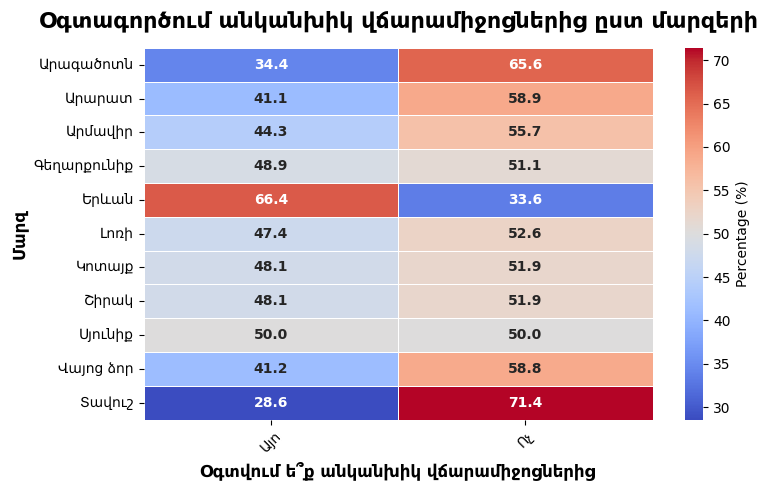

In [ ]:
grouped = data.groupby(['Մարզ', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(
    grouped_percentage,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Percentage (%)'},
    annot_kws={'fontsize': 10, 'weight': 'bold'}
)

plt.title('Օգտագործում անկանխիկ վճարամիջոցներից ըստ մարզերի', fontsize=16, weight='bold', pad=15)
plt.ylabel('Մարզ', fontsize=12, weight='bold')
plt.xlabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=12, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

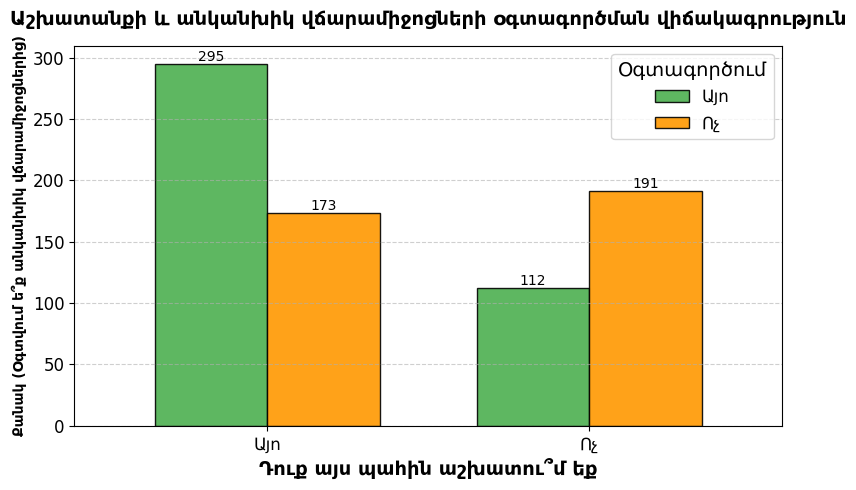

In [ ]:
grouped = data.groupby(['Դուք այս պահին աշխատու՞մ եք ', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))


grouped.plot(
    kind='bar',
    figsize=(8, 5),
    width=0.7,
    color = ['#4CAF50', '#FF9800'],
    edgecolor='black',
    alpha=0.9
)

for i, container in enumerate(plt.gca().containers):
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Աշխատանքի և անկանխիկ վճարամիջոցների օգտագործման վիճակագրություն', fontsize=14, weight='bold', pad=15)
plt.ylabel('Քանակ (Օգտվում ե՞ք անկանխիկ վճարամիջոցներից)', fontsize=10, weight='bold')
plt.xlabel('Դուք այս պահին աշխատու՞մ եք', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


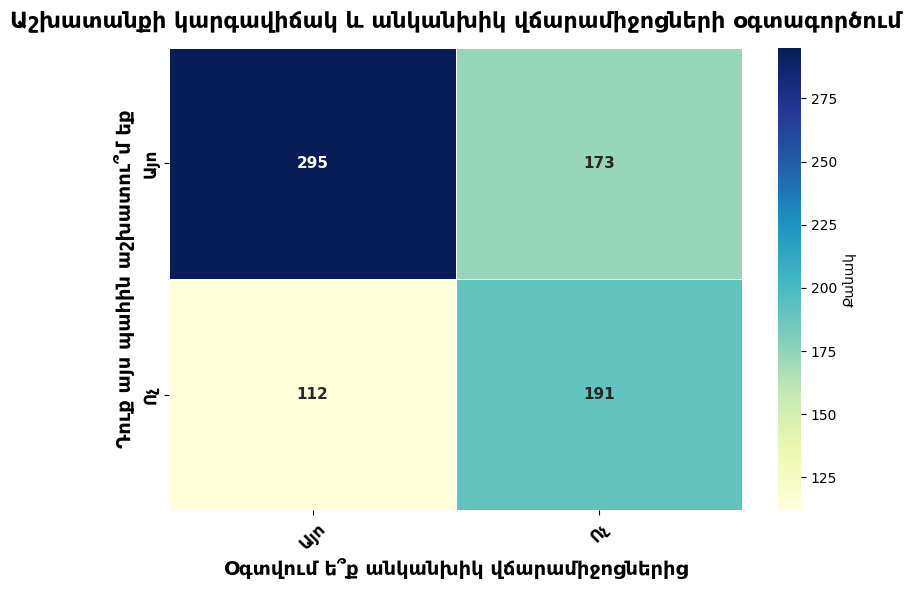

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    grouped,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Քանակ'},
    annot_kws={'fontsize': 11, 'weight': 'bold'}
)

plt.title('Աշխատանքի կարգավիճակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Դուք այս պահին աշխատու՞մ եք', fontsize=14, weight='bold')
plt.xlabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')

plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.tight_layout()

plt.show()

<Figure size 1000x800 with 0 Axes>

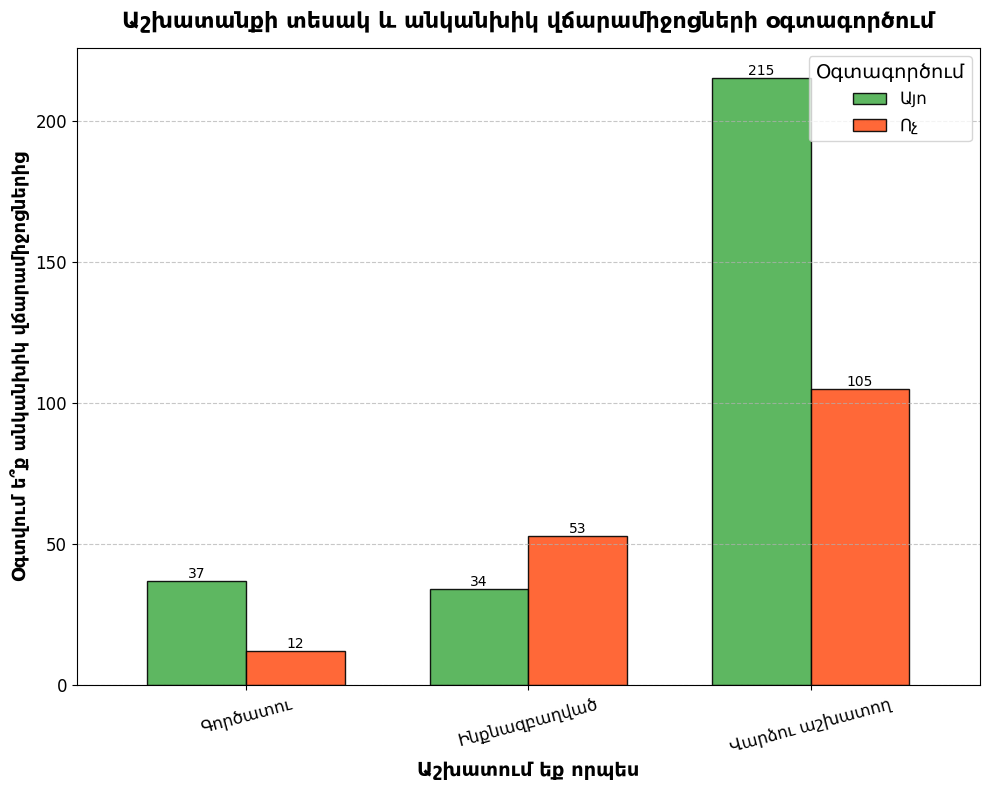

In [ ]:
grouped = data.groupby(['Աշխատում եք որպես', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
colors = ['#4CAF50', '#FF5722']

# Plot
grouped.plot(
    kind='bar',
    figsize=(10, 8),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.9
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Աշխատանքի տեսակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=13, weight='bold')
plt.xlabel('Աշխատում եք որպես', fontsize=14, weight='bold')
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<Figure size 1600x800 with 0 Axes>

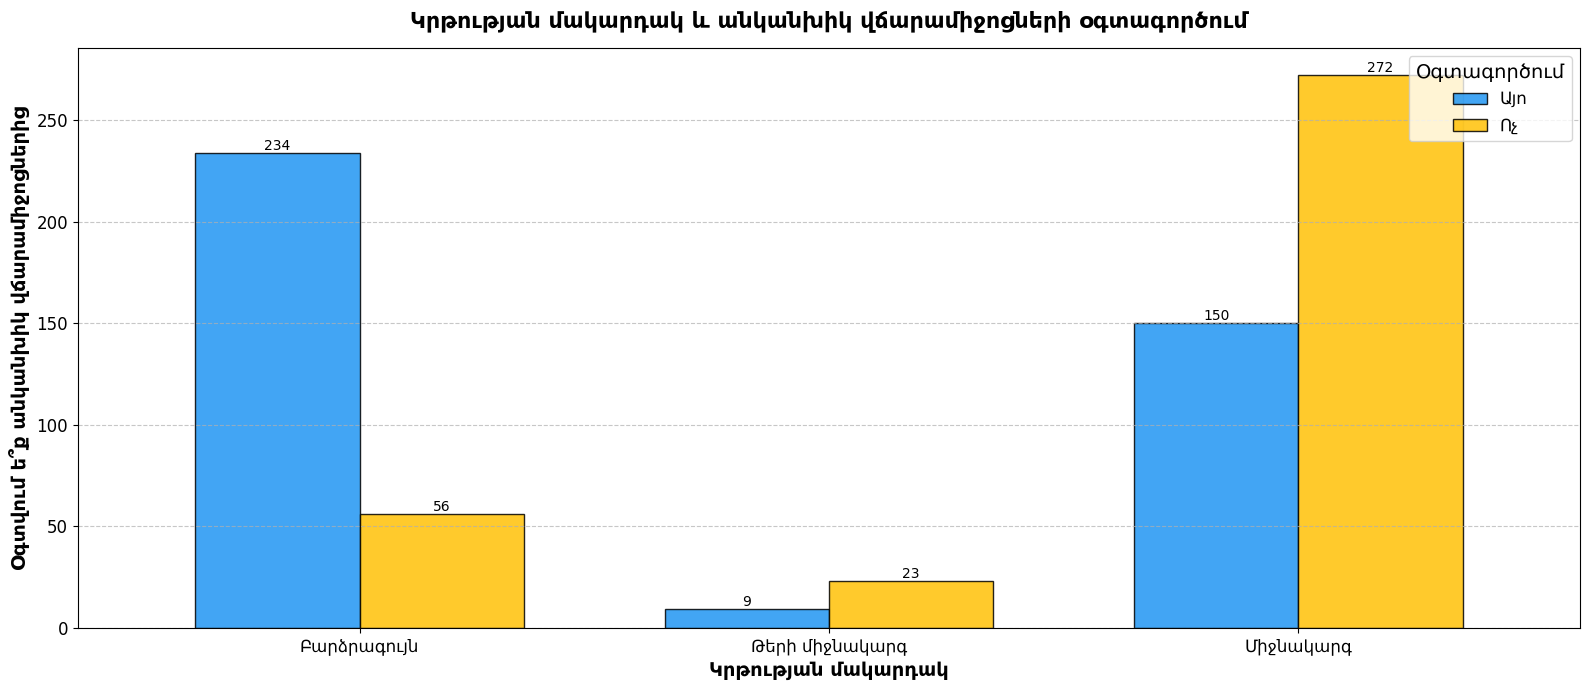

In [ ]:
grouped = data.groupby(['Պատասխանողի կրթությունը', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 8))
colors = ['#2196F3', '#FFC107']

grouped.plot(
    kind='bar',
    figsize=(16, 7),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.85
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Կրթության մակարդակ և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Կրթության մակարդակ', fontsize=14, weight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

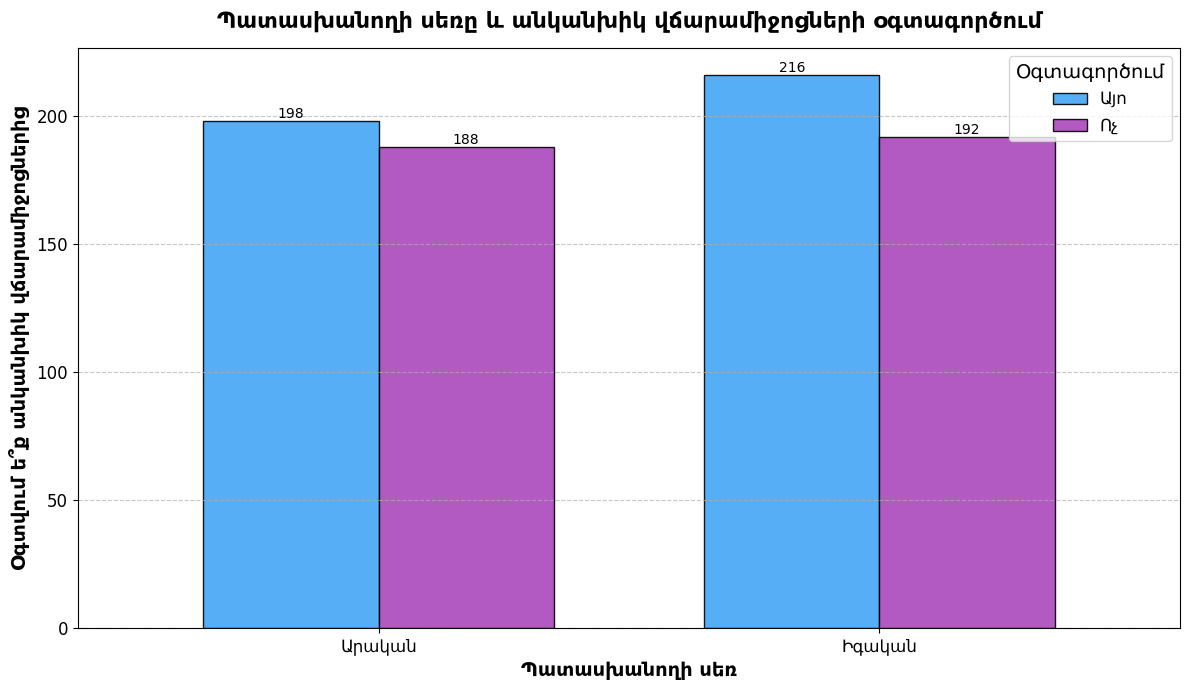

In [ ]:
grouped = data.groupby(['Պատասխանողի սեռը', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
colors = ['#42A5F5', '#AB47BC']

grouped.plot(
    kind='bar',
    figsize=(12, 7),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.9
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Պատասխանողի սեռը և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Պատասխանողի սեռ', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

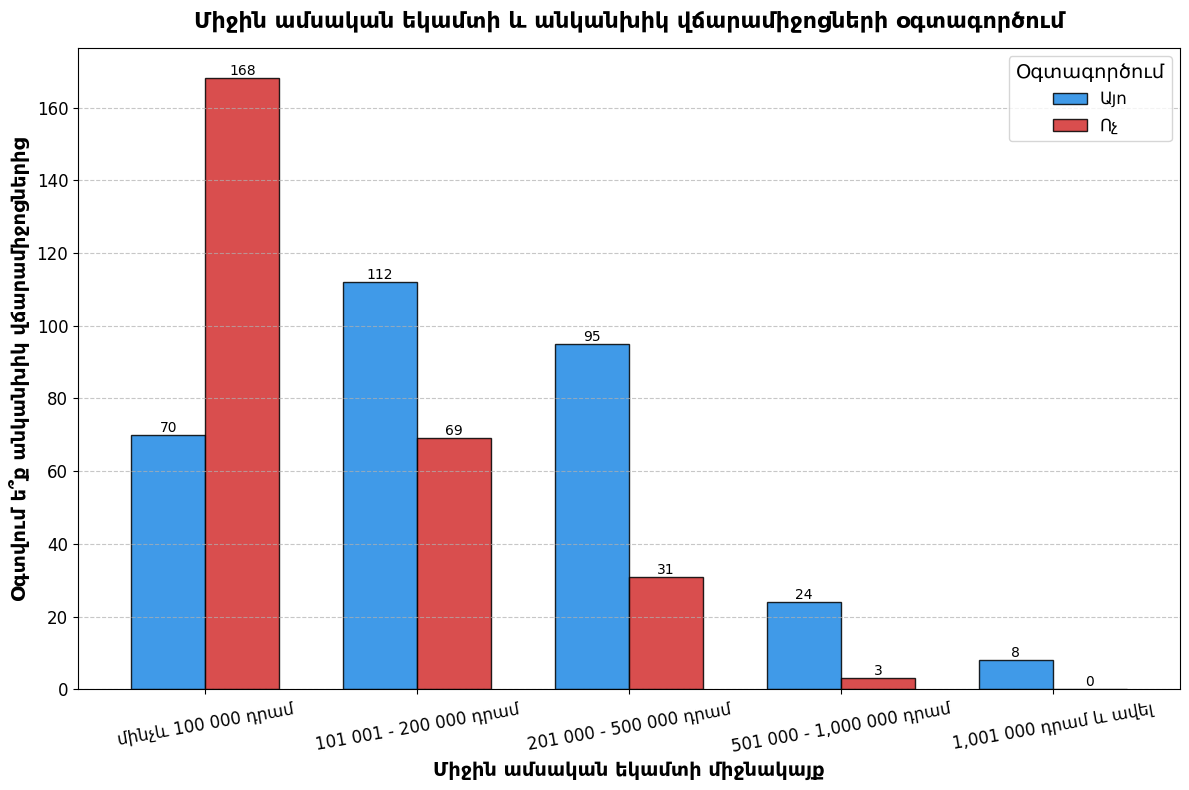

In [ ]:
grouped = data.groupby(['Ձեր միջին ամսական եկամտի միջնակայքը', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
new_order = [grouped.index[-1]] + grouped.index[1:-1].tolist() + [grouped.index[0]]
grouped = grouped.loc[new_order]

plt.figure(figsize=(12, 8))
colors = ['#1E88E5', '#D32F2F']

grouped.plot(
    kind='bar',
    figsize=(12, 8),
    width=0.7,
    color=colors,
    edgecolor='black',
    alpha=0.85
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Միջին ամսական եկամտի և անկանխիկ վճարամիջոցների օգտագործում', fontsize=16, weight='bold', pad=15)
plt.ylabel('Օգտվում ե՞ք անկանխիկ վճարամիջոցներից', fontsize=14, weight='bold')
plt.xlabel('Միջին ամսական եկամտի միջնակայք', fontsize=14, weight='bold')

plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Օգտագործում', fontsize=12, title_fontsize=14, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

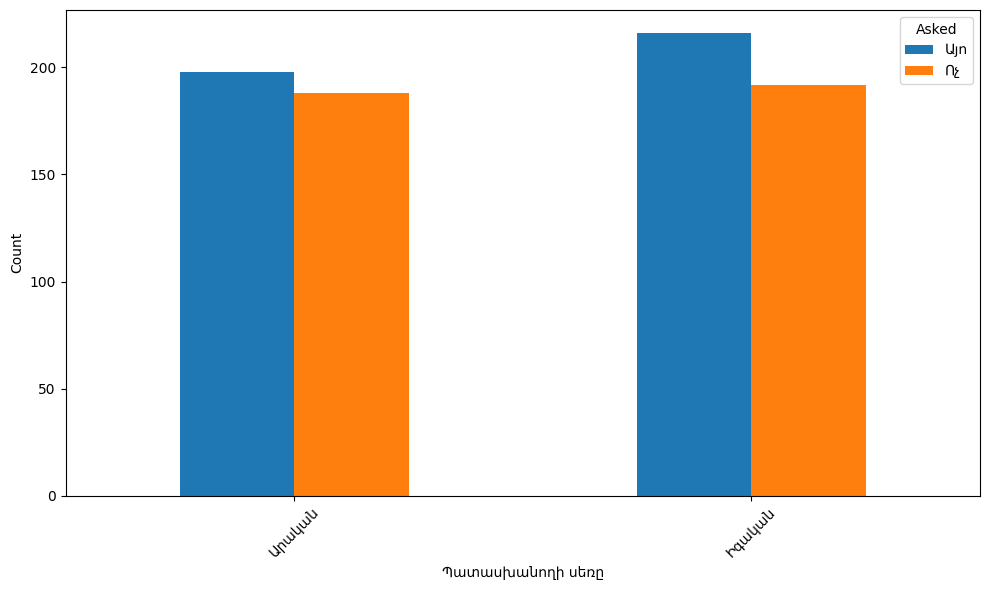

In [ ]:
grouped = data.groupby(['Պատասխանողի սեռը', '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից ']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Asked')
plt.tight_layout()
plt.show()


In [ ]:
all_combined_mappings = [
    {
        'Question': '2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից',
        'Answers': 'Այո, Ոչ'
    },
    {
        'Question': '2.2 Ունե՞ք բանկային հաշիվ',
        'Answers': 'Այո, Ոչ'
    },
    {
        'Question': '3.2 Ձեր ամենօրյա գնումները իրականացնելիս, ՀԻՄՆԱԿԱՆՈՒՄ ի՞նչ եղանակով եք վճարում կատարում',
        'Answers': '1. Կանխիկ, 2. Քարտով, 3. Բանկի հավելված, 4. Թվային դրամապանակ'
    },
    {
        'Question': '4.8 Ձեր ապրելակերպի վրա ինչպիսի՞ ազդեցություն և հետևանքներ կունենա կանխիկ գումարի ամբողջովին փոխարինումը անկանխիկի',
        'Answers': '1. Ինձ համար կյանքը կհեշտանա, 2. Կառաջանան չնչին անհարմարություններ, 3. Կառաջանան զգալի անհարմարություններ, 4. Կառաջանան էական անհարմարություններ, կանխիկը շատ կարևոր է, 5. Դժվարանում եմ պատասխանել'
    },
    {
        'Question': '4.10 Եթե Ձեր ամբողջ գումարը ստիպված լինեք պահել միայն կանխիկ կամ միայն անկանխիկ, ո՞ր եղանակը կնախընտրեիք',
        'Answers': 'Կանխիկ, Անկանխիկ'
    },
    {
        'Question': 'Մարզ',
        'Answers': 'Երևան, Կոտայք, Շիրակ, Սյունիք, Տավուշ, Լոռի, Վայոց ձոր, Արագածոտն, Արարատ, Գեղարքունիք, Արմավիր'
    },
    {
        'Question': 'Դուք այս պահին աշխատու՞մ եք',
        'Answers': 'Այո, Ոչ'
    },
    {
        'Question': 'Պատասխանողի կրթությունը',
        'Answers': 'Բարձրագույն, Միջնակարգ, Թերի միջնակարգ'
    },
    {
        'Question': 'Պատասխանողի տարիքը',
        'Answers': '18-24, 25-34, 35-44, 45-54, 55-64, 65+'
    },
    {
        'Question': 'Ձեր միջին ամսական եկամտի միջնակայքը',
        'Answers': 'մինչև 100 000 դրամ, 101 001 - 200 000 դրամ, 201 000 - 500 000 դրամ, 501 000 - 1,000 000 դրամ, 1,001 000 դրամ և ավել'
    }
]

df_all_combined = pd.DataFrame(all_combined_mappings)
df_all_combined

,Question,Answers
0,2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից,"Այո, Ոչ"
1,2.2 Ունե՞ք բանկային հաշիվ,"Այո, Ոչ"
2,"3.2 Ձեր ամենօրյա գնումները իրականացնելիս, ՀԻՄՆ...","1. Կանխիկ, 2. Քարտով, 3. Բանկի հավելված, 4. Թվ..."
3,4.8 Ձեր ապրելակերպի վրա ինչպիսի՞ ազդեցություն ...,"1. Ինձ համար կյանքը կհեշտանա, 2. Կառաջանան չնչ..."
4,4.10 Եթե Ձեր ամբողջ գումարը ստիպված լինեք պահե...,"Կանխիկ, Անկանխիկ"
5,Մարզ,"Երևան, Կոտայք, Շիրակ, Սյունիք, Տավուշ, Լոռի, Վ..."
6,Դուք այս պահին աշխատու՞մ եք,"Այո, Ոչ"
7,Պատասխանողի կրթությունը,"Բարձրագույն, Միջնակարգ, Թերի միջնակարգ"
8,Պատասխանողի տարիքը,"18-24, 25-34, 35-44, 45-54, 55-64, 65+"
9,Ձեր միջին ամսական եկամտի միջնակայքը,"մինչև 100 000 դրամ, 101 001 - 200 000 դրամ, 20..."


In [ ]:
df['uses_non_cash'] = df['2.3 Օգտվում ե՞ք անկանխիկ վճարամիջոցներից '].map({'Այո': 1, 'Ոչ': 0})
df['gender'] = df['Պատասխանողի սեռը'].map({'Իգական': 1, 'Արական': 2})
df['bank_card'] = df['2.1 Ունե՞ք բանկային քարտ'].map({'Այո': 1, 'Ոչ': 0})
df['bank_account'] = df['2.2 Ունե՞ք բանկային հաշիվ'].map({'Այո': 1, 'Ոչ': 0})
df['payment_methods'] = df['3.2 Ձեր ամենօրյա գնումները իրականացնելիս, ՀԻՄՆԱԿԱՆՈՒՄ ի՞նչ եղանակով եք վճարում կատարում (կարող են նշել մի քանի տարբերակ)'].map({'1. Կանխիկ ': 1 , '2. Քարտով' : 2, '3. Բանկի հավելված': 3 , '4. Թվային դրամապանակ': 4} )
df['cashlesslifestyle'] = df['4.8 Ձեր ապրելակերպի վրա ինչպիսի՞ ազդեցություն և հետևանքներ կունենա կանխիկ գումարի ամբողջովին փոխարինումը անկանխիկի'].map({
    '1. Ինձ համար կյանքը կհեշտանա': 0,
    '2. Կառաջանան չնչին անհարմարություններ': 1,
    '3. Կառաջանան զգալի անհարմարություններ': 2,
    '4. Կառաջանան էական անհարմարություններ, կանխիկը շատ կարևոր է': 3,
    '5. Դժվարանում եմ պատասխանել': 4})
df['preferred_method'] = df['4.10 Եթե Ձեր ամբողջ գումարը ստիպված լինեք պահել միայն կանխիկ կամ միայն անկանխիկ, ո՞ր եղանակը կնախընտրեիք:'].map({
    'Կանխիկ': 0,
    'Անկանխիկ': 1,})
df['region'] = df['Մարզ'].map({
    'Երևան': 1,
    'Կոտայք':0,
    'Շիրակ':0,
    'Սյունիք': 0,
    'Տավուշ': 0,
    'Լոռի': 0,
    'Վայոց ձոր':0,
    'Արագածոտն': 0,
    'Արարատ': 0,
    'Գեղարքունիք': 0,
    'Արմավիր': 0})
df['employed'] = df['Դուք այս պահին աշխատու՞մ եք '].map({'Այո': 1, 'Ոչ': 0})
df['education'] = df['Պատասխանողի կրթությունը'].map({
    'Բարձրագույն': 0,
    'Միջնակարգ': 1,
    'Թերի միջնակարգ': 2})
df['education_higher'] = df['education'].apply(lambda x: 1 if x == 0 else 0)
df['education_secondary'] = df['education'].apply(lambda x: 1 if x == 1 else 0)
df['education_incomplete_secondary'] = df['education'].apply(lambda x: 1 if x == 2 else 0)

df['age'] = df['Պատասխանողի տարիքը'].map({
    '18-24': 0,
    '25-34': 1,
    '35-44': 2,
    '45-54': 3,
    '55-64': 4,
    '65+': 5})
df['age_18_24'] = df['age'].apply(lambda x: 1 if x == 0 else 0)
df['age_25_34'] = df['age'].apply(lambda x: 1 if x == 1 else 0)
df['age_35_44'] = df['age'].apply(lambda x: 1 if x == 2 else 0)
df['age_45_54'] = df['age'].apply(lambda x: 1 if x == 3 else 0)
df['age_55_64'] = df['age'].apply(lambda x: 1 if x == 4 else 0)
df['age_64+'] = df['age'].apply(lambda x: 1 if x == 5 else 0)


df['income'] = df['Ձեր միջին ամսական եկամտի միջնակայքը'].map({
    'մինչև 100 000 դրամ': 0,
    '101 001 - 200 000 դրամ': 1,
    '201 000 - 500 000 դրամ': 2,
    '501 000 - 1,000 000 դրամ': 3,
    '1,001 000 դրամ և ավել': 4})

df['income_0_100k'] = df['income'].apply(lambda x: 1 if x == 0 else 0)
df['income_100_200k'] = df['income'].apply(lambda x: 1 if x == 1 else 0)
df['income_200_500k'] = df['income'].apply(lambda x: 1 if x == 2 else 0)
df['income_500_1m'] = df['income'].apply(lambda x: 1 if x == 3 else 0)
df['income_1m+'] = df['income'].apply(lambda x: 1 if x == 4 else 0)

In [ ]:
df = df[~df['age'].isna()]

In [ ]:
df.age.unique()

array([3., 1., 2., 4., 5., 0.])

In [ ]:
df = df[~df['income'].isna()]

In [ ]:
df.income.unique()

array([1., 0., 2., 3., 4.])

In [ ]:
df = df[~df['education'].isna()]

In [ ]:
df.education.unique()

array([1., 0., 2.])

In [ ]:
df = df[~df['gender'].isna()]

In [ ]:
df.gender.unique()

array([2., 1.])

In [ ]:
import statsmodels.formula.api as smf

df['age'] = df['age'].astype('category')
df['age'] = df['age'].cat.set_categories([1, 0, 2, 3, 4, 5], ordered=True)


logit_model = smf.logit(
    'uses_non_cash ~ cashlesslifestyle + preferred_method + C(income) + C(age) + C(education) + C(gender) + bank_card',
    data=df
)


logit_result = logit_model.fit()

print(logit_result.summary())


         Current function value: 0.407620
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          uses_non_cash   No. Observations:                  362
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                           15
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.4023
Time:                        12:52:22   Log-Likelihood:                -147.56
converged:                      False   LL-Null:                       -246.88
Covariance Type:            nonrobust   LLR p-value:                 4.021e-34
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3541      0.600     -0.590      0.555      -1.530       0.822
C(income)[T.1.0]        1.0515      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.formula.api as smf

logit_model = smf.logit(
    formula=(
        'uses_non_cash ~ C(income, Treatment(reference=1)) + '
        'C(age, Treatment(reference=1)) + '
        'C(education, Treatment(reference= 0 )) + '
        'cashlesslifestyle + preferred_method + bank_card +'
        'C(gender, Treatment(reference = 2 ))'
    ),
    data=df
)

logit_result = logit_model.fit()
print(logit_result.summary())


         Current function value: 0.407620
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          uses_non_cash   No. Observations:                  362
Model:                          Logit   Df Residuals:                      346
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 Dec 2024   Pseudo R-squ.:                  0.4023
Time:                        07:07:19   Log-Likelihood:                -147.56
converged:                      False   LL-Null:                       -246.88
Covariance Type:            nonrobust   LLR p-value:                 4.021e-34
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       0.4213      0.583      0.723  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
marginal_effects = logit_result.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:          uses_non_cash
Method:                          dydx
At:                           overall
                                                 dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
C(income, Treatment(reference=1))[T.0.0]       -0.1376      0.046     -2.976      0.003      -0.228      -0.047
C(income, Treatment(reference=1))[T.2.0]        0.0147      0.054      0.270      0.787      -0.092       0.121
C(income, Treatment(reference=1))[T.3.0]        0.0707      0.114      0.623      0.533      -0.152       0.293
C(income, Treatment(reference=1))[T.4.0]        3.8230    3.9e+05   9.81e-06      1.000   -7.64e+05    7.64e+05
C(age, Treatment(reference=1))[T.0.0]           0.1778      0.098      1.820      0.069      -0.014       0.369
C(age, Treatment(reference=1))[T.2.0]          -0.0842      0.05

In [ ]:
df = pd.get_dummies(df, columns=['age'], prefix='age', drop_first=False)


In [ ]:
import statsmodels.formula.api as smf

logit_model = smf.logit(
    'uses_non_cash ~ cashlesslifestyle + preferred_method + income + age_0 + age_1 + age_2 + age_3 + age_4 + age_5 + education + bank_card',
    data=df
)

logit_result = logit_model.fit()

print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.413282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          uses_non_cash   No. Observations:                  362
Model:                          Logit   Df Residuals:                      351
Method:                           MLE   Df Model:                           10
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.3940
Time:                        12:53:05   Log-Likelihood:                -149.61
converged:                       True   LL-Null:                       -246.88
Covariance Type:            nonrobust   LLR p-value:                 2.221e-36
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7396   9.82e+06  -7.53e-08      1.000   -1.93e+07    1.93e+07
age_0[T.

In [ ]:
odds_ratios = pd.DataFrame({
    "Variable": logit_result.params.index,
    "Odds Ratio": np.exp(logit_result.params.values)
})

odds_ratios["Odds Ratio"] = odds_ratios["Odds Ratio"].map("{:.2f}".format)
print("Odds Ratios:")
print(odds_ratios)


Odds Ratios:
                                       Variable        Odds Ratio
0                                     Intercept              1.52
1      C(income, Treatment(reference=1))[T.0.0]              0.35
2      C(income, Treatment(reference=1))[T.2.0]              1.12
3      C(income, Treatment(reference=1))[T.3.0]              1.72
4      C(income, Treatment(reference=1))[T.4.0]  4851351721206.18
5         C(age, Treatment(reference=1))[T.0.0]              3.89
6         C(age, Treatment(reference=1))[T.2.0]              0.53
7         C(age, Treatment(reference=1))[T.3.0]              0.33
8         C(age, Treatment(reference=1))[T.4.0]              0.42
9         C(age, Treatment(reference=1))[T.5.0]              0.14
10  C(education, Treatment(reference=0))[T.1.0]              0.24
11  C(education, Treatment(reference=0))[T.2.0]              0.13
12     C(gender, Treatment(reference=2))[T.1.0]              1.32
13                            cashlesslifestyle              0.

# Hypothesis

In [ ]:
df['qr'] = df['2.7 Օգտվու՞մ եք արդյոք QR համակարգերից՝ վճարումներ կատարելիս'].map({
    'Այո': 0,
    'Ոչ': 1,})
df['crypyo'] = df['4.2 Երբևիցէ կրիպտոաժույթ ունեցե՞լ եք'].map({
    'Այո': 0,
    'Ոչ': 1,})
df['cbdc'] = df['4.4 Նախքան Ձեզ տեղեկացնելը, լսե՞լ էիք կենտրոնական բանկերի թվային արժույթի մասին'].map({
    'Այո': 0,
    'Ոչ': 1,
    'Չի հետաքրքրում': 3})

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
qr_yes = df[df['qr'] == 0]['uses_non_cash'].sum()
qr_total_yes = df[df['qr'] == 0].shape[0]
qr_no = df[df['qr'] == 1]['uses_non_cash'].sum()
qr_total_no = df[df['qr'] == 1].shape[0]

count_qr = [qr_yes, qr_no]
nobs_qr = [qr_total_yes, qr_total_no]
z_stat_qr, p_val_qr = proportions_ztest(count_qr, nobs_qr)

print("Hypothesis Test: QR Code Usage and Non-Cash Adoption (Z-Test for Proportions)")
print(f"Z-Statistic: {z_stat_qr:.3f}")
print(f"P-Value: {p_val_qr:.3f}")
if p_val_qr < 0.05:
    print("Conclusion: Reject H0 (Significant relationship between QR usage and non-cash payment adoption)")
else:
    print("Conclusion: Fail to reject H0 (No significant relationship between QR usage and non-cash payment adoption)")


Hypothesis Test: QR Code Usage and Non-Cash Adoption (Z-Test for Proportions)
Z-Statistic: -0.224
P-Value: 0.823
Conclusion: Fail to reject H0 (No significant relationship between QR usage and non-cash payment adoption)


In [ ]:
from scipy.stats import chi2_contingency

contingency_crypto = pd.crosstab(df['crypyo'], df['uses_non_cash'])

chi2_crypto, p_val_crypto, dof_crypto, expected_crypto = chi2_contingency(contingency_crypto)

print("\nHypothesis Test: Cryptocurrency Ownership and Non-Cash Adoption (Chi-Square Test)")
print(f"Chi2 Statistic: {chi2_crypto:.3f}")
print(f"P-Value: {p_val_crypto:.3f}")
if p_val_crypto < 0.05:
    print("Conclusion: Reject H0 (Significant relationship between cryptocurrency ownership and non-cash payment adoption)")
else:
    print("Conclusion: Fail to reject H0 (No significant relationship between cryptocurrency ownership and non-cash payment adoption)")



Hypothesis Test: Cryptocurrency Ownership and Non-Cash Adoption (Chi-Square Test)
Chi2 Statistic: 0.893
P-Value: 0.345
Conclusion: Fail to reject H0 (No significant relationship between cryptocurrency ownership and non-cash payment adoption)


In [ ]:
contingency_cbdc = pd.crosstab(df['cbdc'], df['uses_non_cash'])

chi2_cbdc, p_val_cbdc, dof_cbdc, expected_cbdc = chi2_contingency(contingency_cbdc)

print("\nHypothesis Test: CBDC Awareness and Non-Cash Adoption (Chi-Square Test)")
print(f"Chi2 Statistic: {chi2_cbdc:.3f}")
print(f"P-Value: {p_val_cbdc:.3f}")
if p_val_cbdc < 0.05:
    print("Conclusion: Reject H0 (Significant relationship between CBDC awareness and non-cash payment adoption)")
else:
    print("Conclusion: Fail to reject H0 (No significant relationship between CBDC awareness and non-cash payment adoption)")



Hypothesis Test: CBDC Awareness and Non-Cash Adoption (Chi-Square Test)
Chi2 Statistic: 38.630
P-Value: 0.000
Conclusion: Reject H0 (Significant relationship between CBDC awareness and non-cash payment adoption)


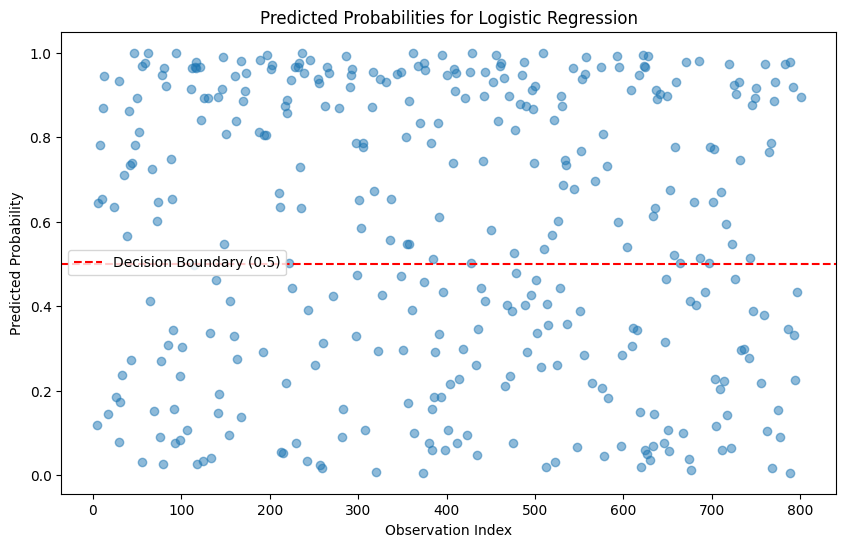

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(predicted_probs, 'o', alpha=0.5)
plt.title("Predicted Probabilities for Logistic Regression")
plt.xlabel("Observation Index")
plt.ylabel("Predicted Probability")
plt.axhline(y=0.5, color='red', linestyle='--', label="Decision Boundary (0.5)")
plt.legend()
plt.show()


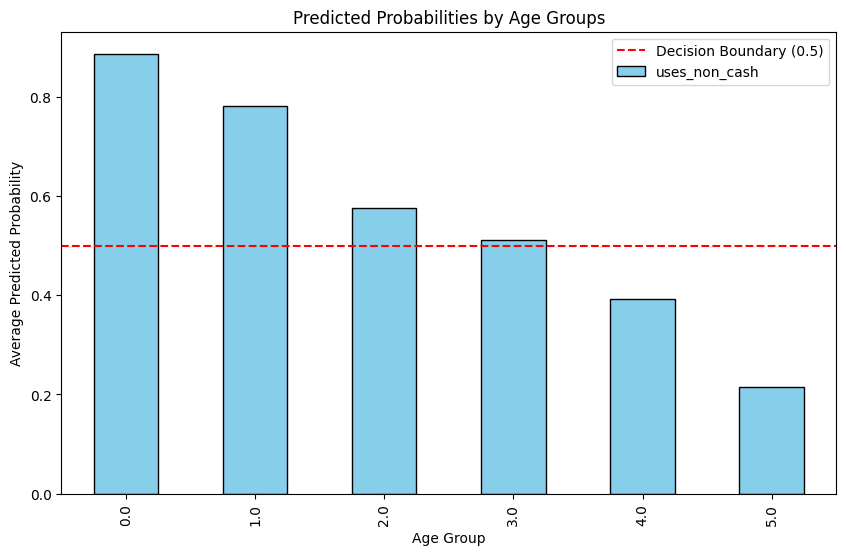

In [ ]:

age_groups = df.groupby('age')['uses_non_cash'].mean()

plt.figure(figsize=(10, 6))
age_groups.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Predicted Probabilities by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Average Predicted Probability")
plt.axhline(y=0.5, color='red', linestyle='--', label="Decision Boundary (0.5)")
plt.legend()
plt.show()



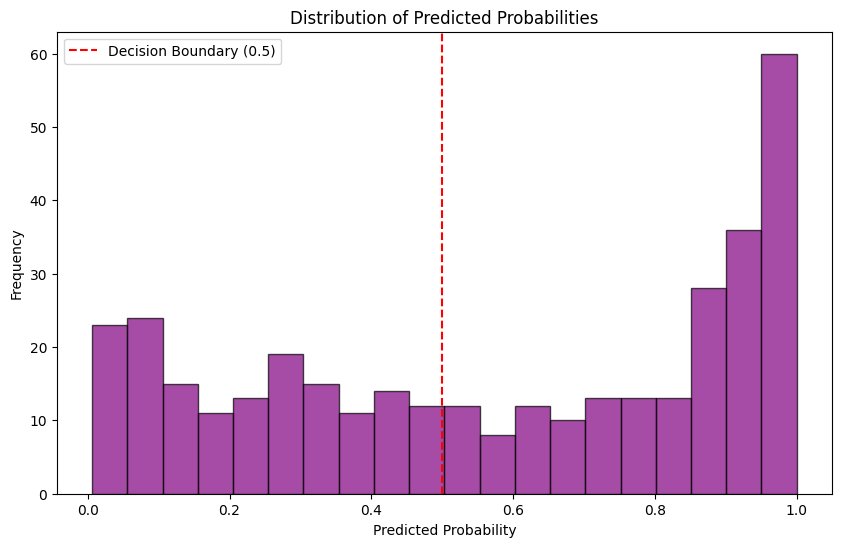

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(predicted_probs, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.axvline(x=0.5, color='red', linestyle='--', label="Decision Boundary (0.5)")
plt.legend()
plt.show()


<ipython-input-54-22f01f4effe6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['education'], y=predicted_probs, palette=custom_colors)


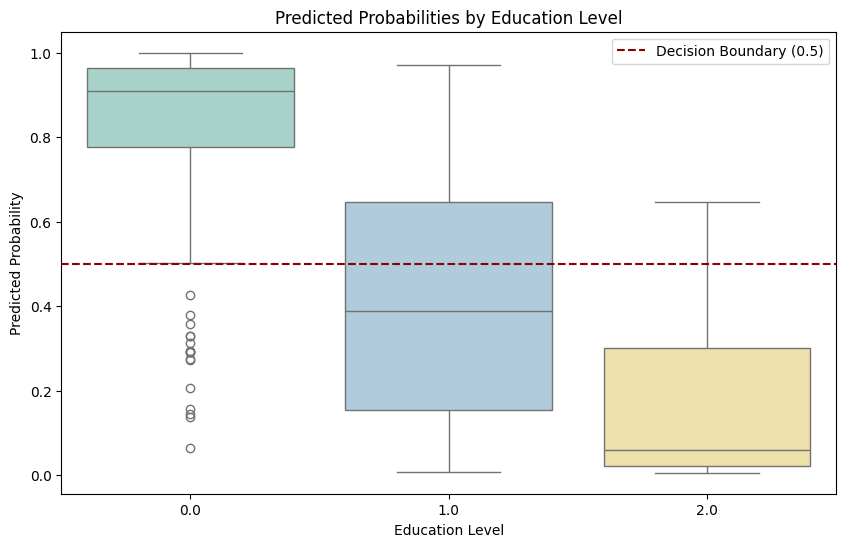

In [ ]:

custom_colors = ["#A2D9CE", "#A9CCE3", "#F9E79F"]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['education'], y=predicted_probs, palette=custom_colors)
plt.title("Predicted Probabilities by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Predicted Probability")
plt.axhline(y=0.5, color='darkred', linestyle='--', label="Decision Boundary (0.5)")
plt.legend()
plt.show()
